# Historical AQI Data Analysis

This notebook demonstrates how to download, analyze, and visualize historical Air Quality Index (AQI) data for Indian cities.

In [1]:
!pip install matplotlib seaborn pandas
from cpcbfetch import AQIClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 7.5 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 8.4 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 8.8 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 8.7 MB/s  0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   -------------------------------- ------- 1.8/2.3 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 8.5 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   --------- ------------------

## 1. Downloading Historical Data

Let's download AQI data for a city (e.g., Delhi) for analysis.

In [2]:
# Initialize AQI client
client = AQIClient()

# Download city-level data for Delhi in 2024
# Note: Uncomment the following lines to actually download data

city = "Delhi"
year = "2024"
output_file = f"{city.lower()}_aqi_{year}.csv"

df = client.download_past_year_AQI_data_cityLevel(city, year, output_file)
print(f"Data downloaded to {output_file}")

# Display the first few rows of the dataframe
print(df)

   Day  January  February  March  April    May   June   July  August  \
0    1    346.0     176.0  208.0  133.0  200.0  245.0  105.0    64.0   
1    2    340.0     215.0  117.0  144.0  197.0  173.0  118.0    76.0   
2    3    341.0     199.0  126.0  167.0  264.0  155.0  108.0    68.0   
3    4    377.0     274.0  141.0  173.0  282.0  211.0   61.0    64.0   
4    5    333.0     177.0  125.0  174.0  292.0  251.0   77.0    59.0   
5    6    319.0     140.0  138.0  168.0  248.0  183.0   65.0    61.0   
6    7    333.0     174.0  181.0  179.0  303.0  231.0   56.0    61.0   
7    8    345.0     161.0  157.0  191.0  225.0  237.0   56.0    54.0   
8    9    343.0     146.0  145.0  203.0  179.0  182.0   84.0    61.0   
9   10    273.0     295.0  182.0  222.0  180.0  172.0  138.0    71.0   
10  11    348.0     313.0  201.0  240.0  242.0  223.0  113.0    69.0   
11  12    340.0     300.0  190.0  232.0  184.0  213.0  107.0    56.0   
12  13    398.0     341.0  165.0  198.0  228.0  195.0  102.0    

## 2. Loading and Exploring the Data

Load the downloaded CSV file and explore its structure.

In [5]:
# Load the data
df = pd.read_csv(output_file)

# For demonstration purposes, let's create sample data structure
# Uncomment the above line when you have actual data

print("Dataset Information:")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nFirst few rows:")
df.sample()

Dataset Information:
Shape: (31, 13)

Columns: ['Day', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

Data types:
Day            int64
January      float64
February     float64
March        float64
April        float64
May          float64
June         float64
July         float64
August       float64
September    float64
October      float64
November     float64
December     float64
dtype: object

First few rows:


,Day,January,February,March,April,May,June,July,August,September,October,November,December
9,10,273.0,295.0,182.0,222.0,180.0,172.0,138.0,71.0,106.0,132.0,334.0,234.0


## 3. Statistical Summary

Get basic statistics about the AQI data.

In [10]:
# Statistical summary
print("AQI Statistics:")
print(df.describe())

AQI Statistics:
             Day     January    February       March       April         May  \
count  31.000000   31.000000   29.000000   31.000000   30.000000   31.000000   
mean   16.000000  354.838710  217.586207  175.903226  183.400000  224.032258   
std     9.092121   32.498304   63.680855   33.640605   30.723012   37.689507   
min     1.000000  273.000000  140.000000  117.000000  129.000000  156.000000   
25%     8.500000  336.500000  161.000000  151.000000  165.500000  192.500000   
50%    16.000000  348.000000  199.000000  178.000000  182.500000  230.000000   
75%    23.500000  368.000000  270.000000  196.000000  202.250000  244.500000   
max    31.000000  447.000000  341.000000  243.000000  240.000000  303.000000   

             June        July      August   September     October    November  \
count   30.000000   31.000000   31.000000   30.000000   31.000000   30.000000   
mean   179.133333   96.064516   72.161290  105.100000  234.000000  374.233333   
std     51.481321   

## 4. Time Series Visualization

Plot AQI trends over time.

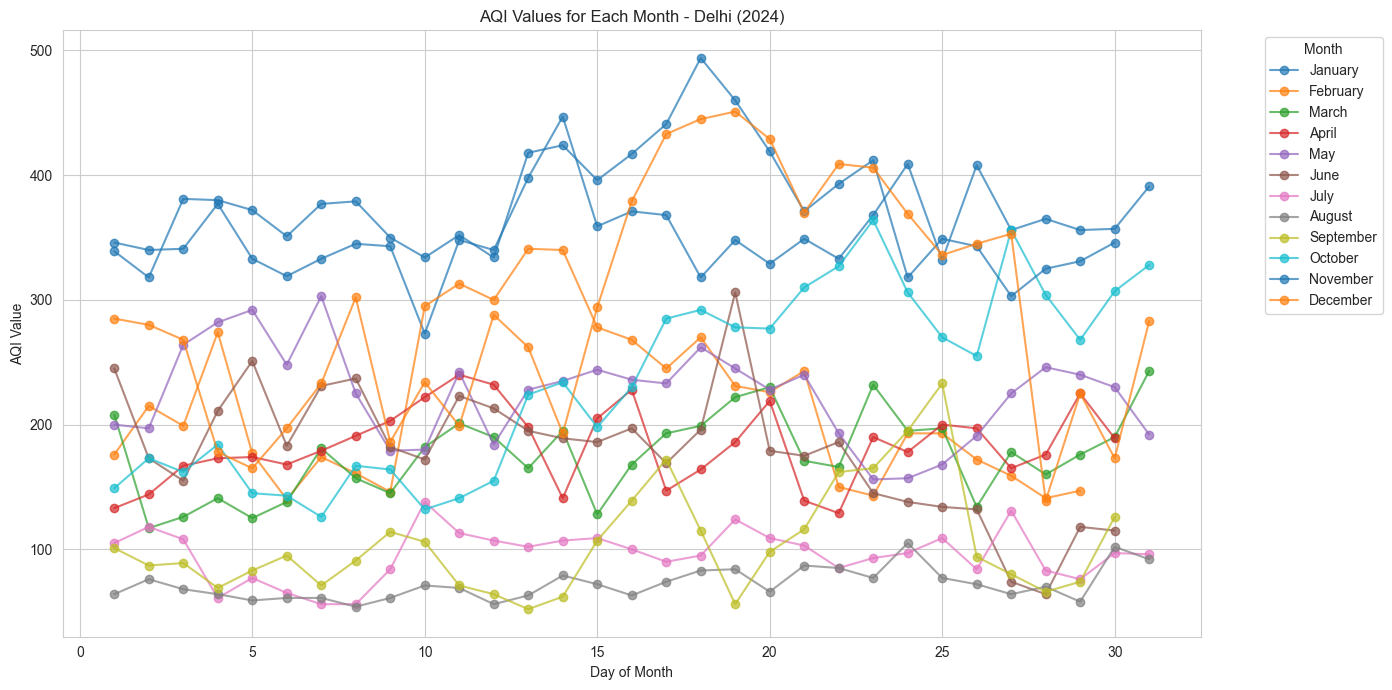

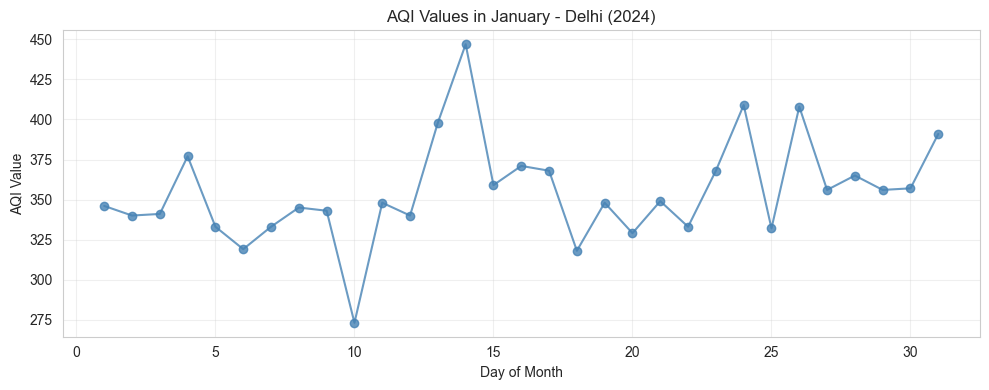

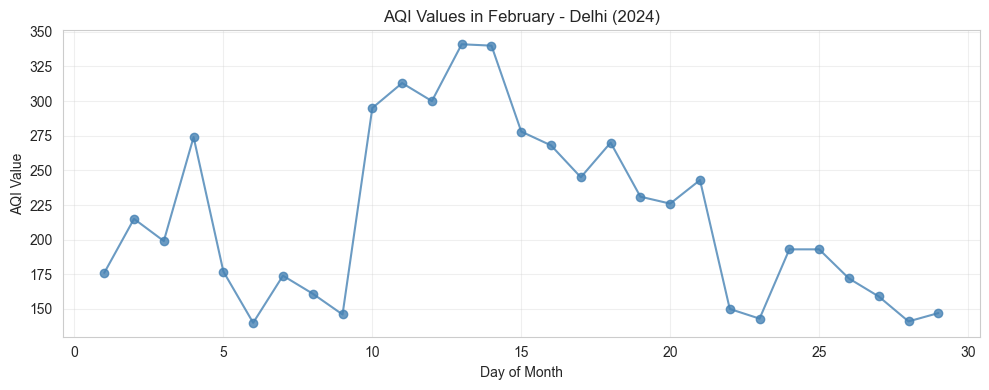

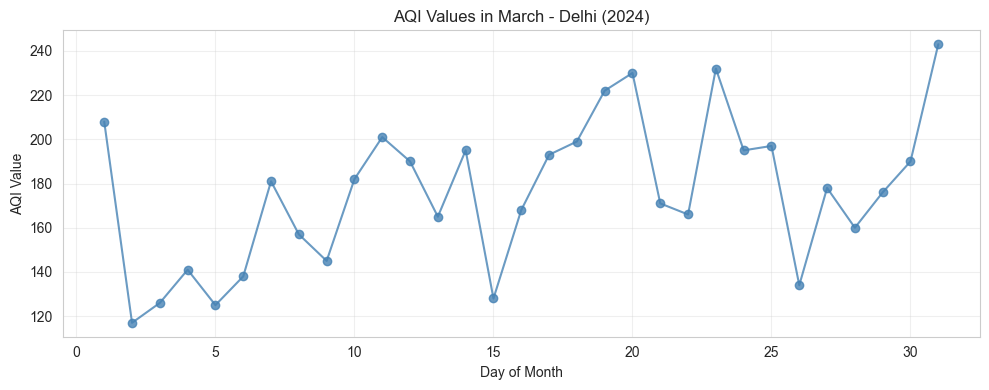

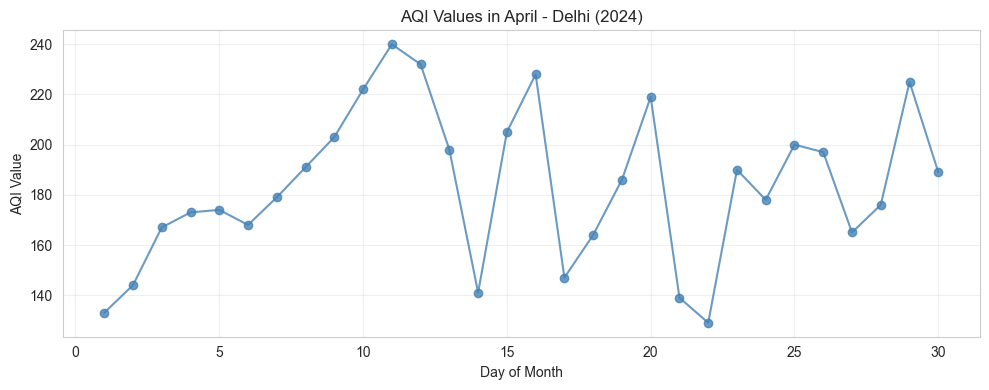

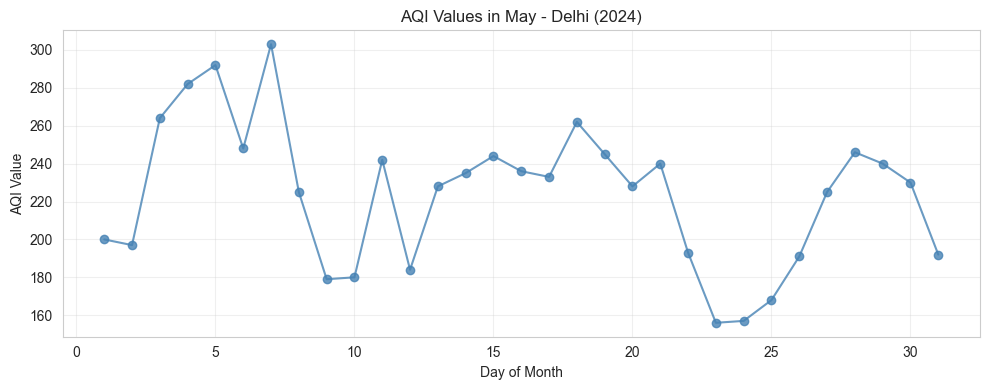

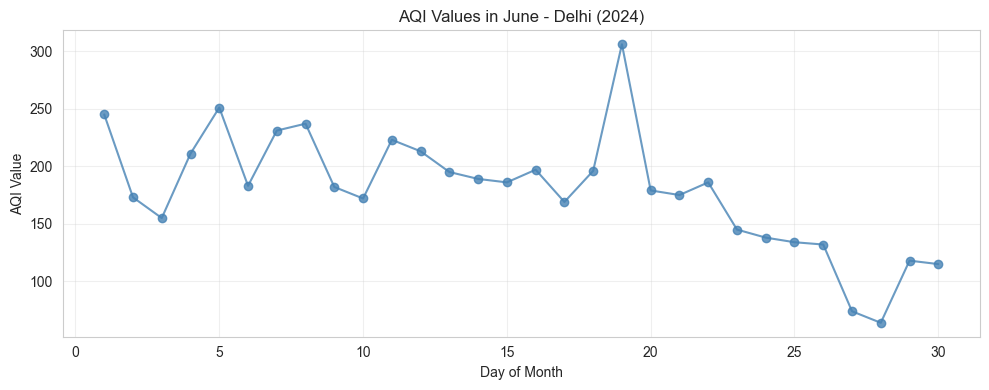

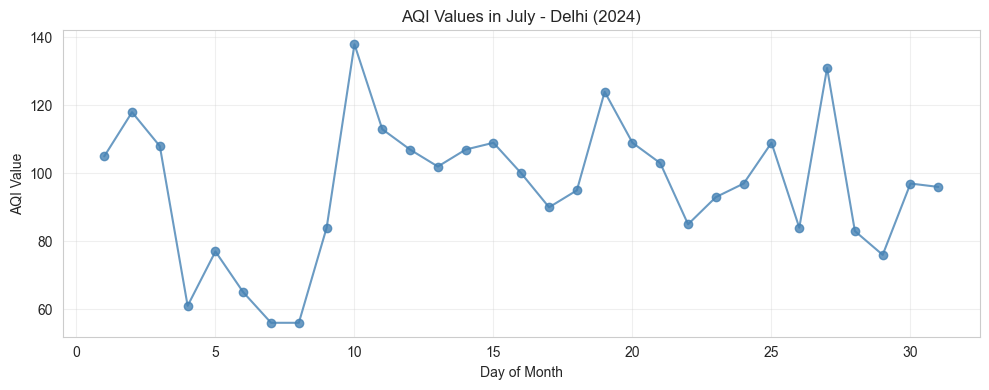

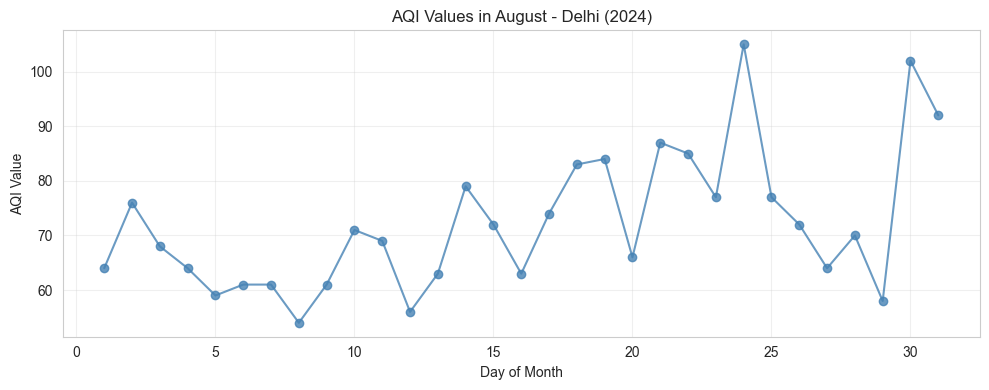

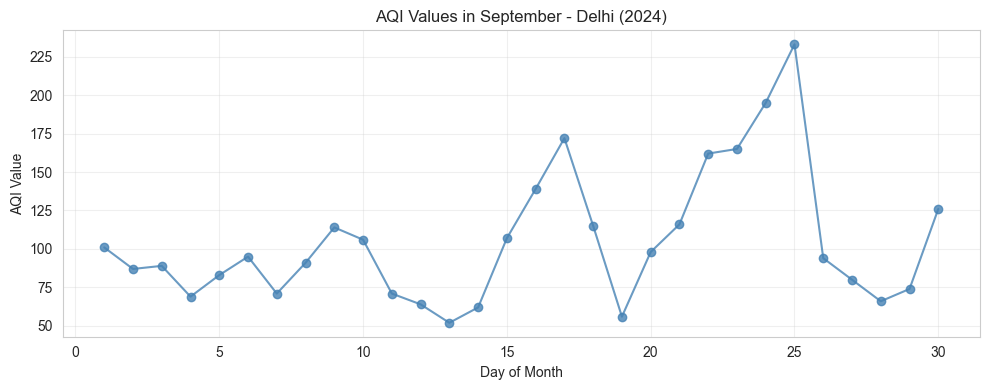

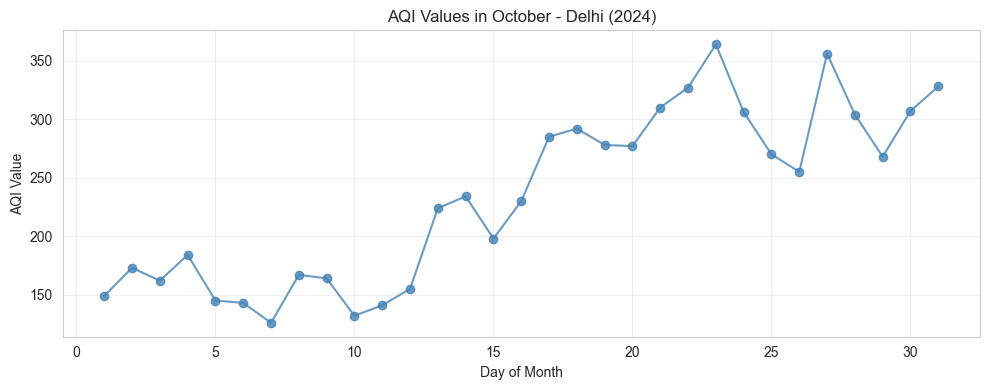

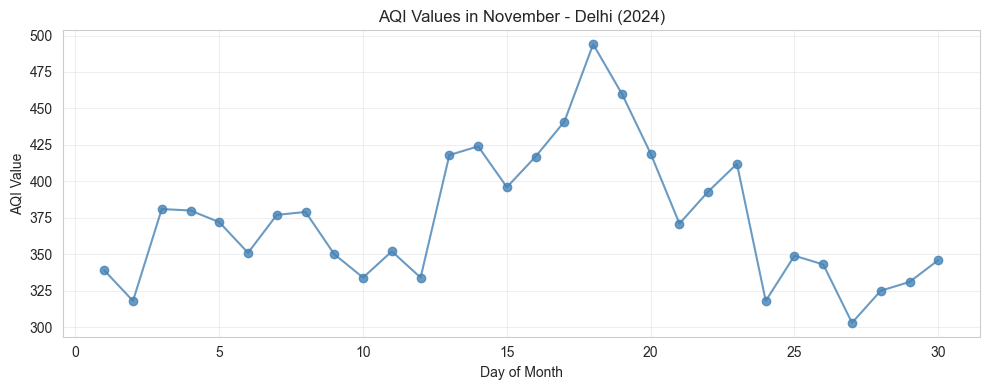

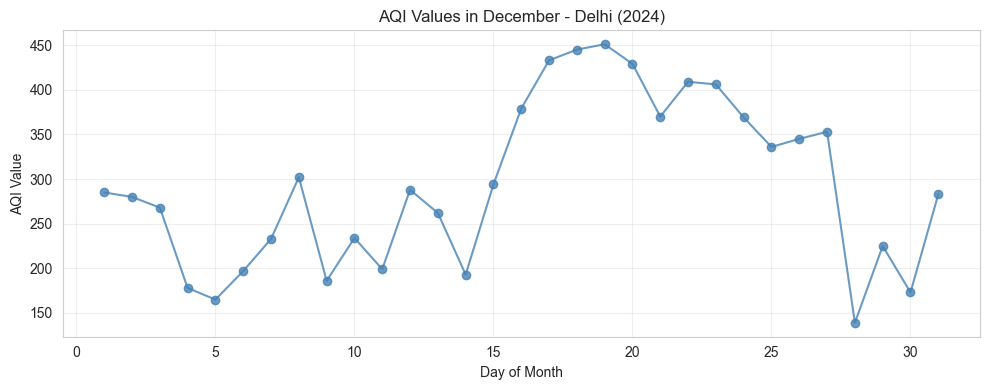

In [12]:
# Plot all months' AQI data for all days in a single graph

months = df.columns[1:]  # Exclude 'Day' column

plt.figure(figsize=(14, 7))
for month in months:
    plt.plot(df['Day'], df[month], marker='o', label=month, alpha=0.7)

plt.xlabel('Day of Month')
plt.ylabel('AQI Value')
plt.title(f'AQI Values for Each Month - {city} ({year})')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot each month's AQI data in a separate graph
for month in months:
    plt.figure(figsize=(10, 4))
    plt.plot(df['Day'], df[month], marker='o', color='steelblue', alpha=0.8)
    plt.xlabel('Day of Month')
    plt.ylabel('AQI Value')
    plt.title(f'AQI Values in {month} - {city} ({year})')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## 5. Monthly Analysis

Analyze AQI patterns by month.

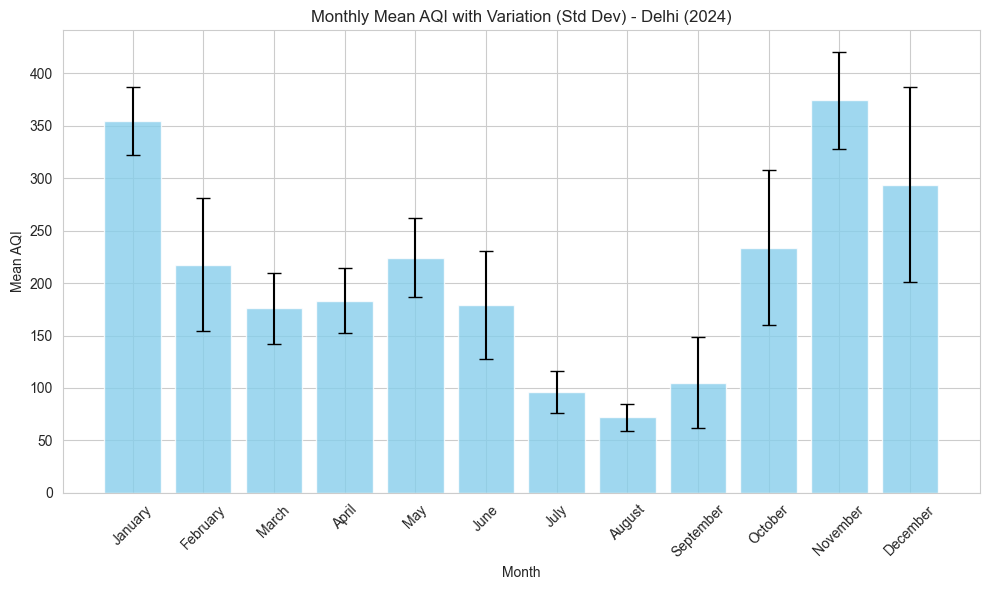

In [14]:
# Calculate mean and standard deviation of AQI for each month
aqi_means = df[months].mean()
aqi_stds = df[months].std()

# Plot mean AQI with error bars representing standard deviation
plt.figure(figsize=(10, 6))
plt.bar(months, aqi_means, yerr=aqi_stds, capsize=5, color='skyblue', alpha=0.8)
plt.ylabel('Mean AQI')
plt.xlabel('Month')
plt.title(f'Monthly Mean AQI with Variation (Std Dev) - {city} ({year})')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

This notebook demonstrated how to:
- Download historical AQI data
- Perform basic data analysis
- Visualize trends and patterns
- Export analysis results

For more examples, check out the other notebooks in this series!